In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

# 1. Define the ViT Patch Embedding Layer
class PatchEmbedding(nn.Module):
    def __init__(self, patch_size, embed_dim):
        super(PatchEmbedding, self).__init__()
        self.patch_size = patch_size
        self.proj = nn.Conv2d(3, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        x = self.proj(x)
        x = x.flatten(2).transpose(1, 2)  # (batch_size, num_patches, embed_dim)
        return x




Files already downloaded and verified
torch.Size([64, 4, 4, 3])


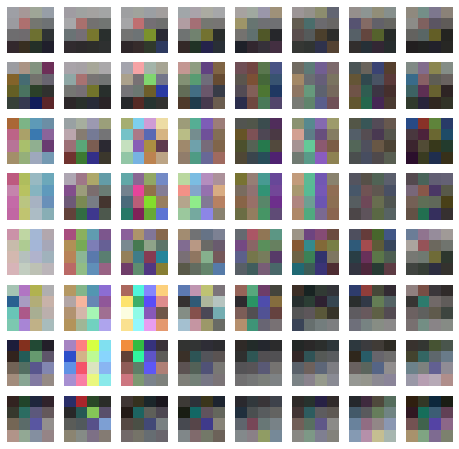

In [11]:
# 2. Load CIFAR-10 Dataset
transform = transforms.Compose([transforms.ToTensor()])
cifar10 = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
image, label = cifar10[0]



# Parameters
patch_size = 4  # Example patch size
embed_dim = 64  # Example embedding dimension

# 1. Visualize the Patches Before Embedding (in original image space)
patches = image.squeeze().permute(1, 2, 0).unfold(0, patch_size, patch_size).unfold(1, patch_size, patch_size)
patches = patches.contiguous().view(-1, patch_size, patch_size, 3)  # Reshape patches to (num_patches, patch_size, patch_size, channels)

# Print the shape of patches to debug
print(patches.shape)

# Get the patch grid size
patch_grid_size = int(patches.size(0) ** 0.5)

# Create a grid to display the patches
fig, ax = plt.subplots(patch_grid_size, patch_grid_size, figsize=(8, 8))

for i in range(patch_grid_size):
    for j in range(patch_grid_size):
        patch = patches[i * patch_grid_size + j].numpy()
        ax[i, j].imshow(patch)
        ax[i, j].axis('off')

plt.show()

torch.Size([1, 64, 64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

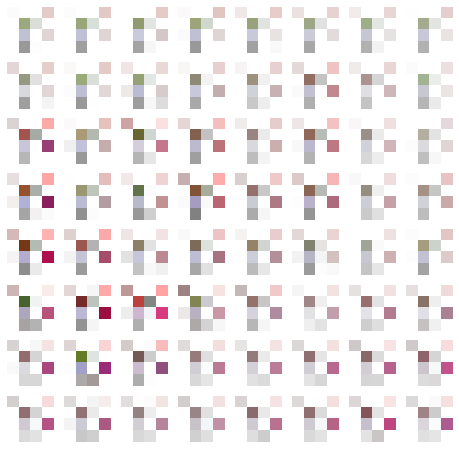

In [12]:
patch_embedding = PatchEmbedding(patch_size, embed_dim)

# 3. Visualize the Patch Embeddings
image = image.unsqueeze(0)  # Add batch dimension
patch_embeddings = patch_embedding(image)

# Print the shape of patch embeddings to debug
print(patch_embeddings.shape)

# Visualize the patch embeddings
fig, ax = plt.subplots(patch_grid_size, patch_grid_size, figsize=(8, 8))

for i in range(patch_grid_size):
    for j in range(patch_grid_size):
        patch_embed = patch_embeddings[0, i * patch_grid_size + j].detach().numpy()
        ax[i, j].imshow(patch_embed.reshape(patch_size, patch_size, -1))
        ax[i, j].axis('off')

plt.show()